In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset=load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
df_diabetes = pd.DataFrame(dataset.data,columns=['age',
                                                   'sex','bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])

In [7]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
X=df_diabetes

In [9]:
y=dataset['target']

In [10]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.25 , random_state=42)

In [11]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.159513,0.180804,0.324133,0.262160,0.199716,-0.023058,0.165480,0.266254,0.266706
sex,0.159513,1.000000,0.045831,0.180247,0.017967,0.110442,-0.338820,0.308991,0.105984,0.159663
bmi,0.180804,0.045831,1.000000,0.375038,0.255045,0.257140,-0.360168,0.428866,0.450936,0.389013
bp,0.324133,0.180247,0.375038,1.000000,0.242522,0.161199,-0.107979,0.208703,0.365678,0.375972
s1,0.262160,0.017967,0.255045,0.242522,1.000000,0.892852,0.042951,0.555728,0.520963,0.308419
s2,0.199716,0.110442,0.257140,0.161199,0.892852,1.000000,-0.194325,0.656085,0.298622,0.272405
s3,-0.023058,-0.338820,-0.360168,-0.107979,0.042951,-0.194325,1.000000,-0.735179,-0.379108,-0.283662
s4,0.165480,0.308991,0.428866,0.208703,0.555728,0.656085,-0.735179,1.000000,0.615701,0.419010
s5,0.266254,0.105984,0.450936,0.365678,0.520963,0.298622,-0.379108,0.615701,1.000000,0.456972
s6,0.266706,0.159663,0.389013,0.375972,0.308419,0.272405,-0.283662,0.419010,0.456972,1.000000


<Axes: >

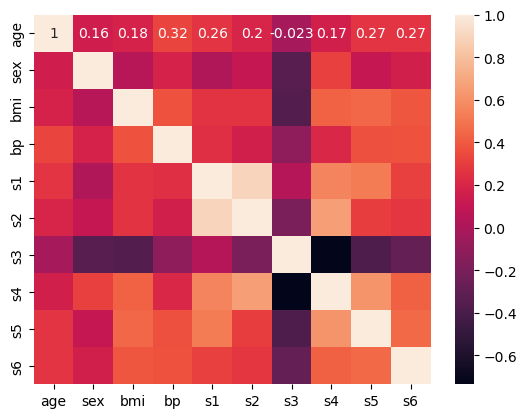

In [12]:
sns.heatmap(X_train.corr(),annot=True)

# Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [14]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

# Hyperparameter tunning

In [15]:
params = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid = GridSearchCV(regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [20]:
grid.best_score_

-4084.543411396045

In [21]:
y_pred=grid.predict(X_test)

In [22]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [23]:
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_test,y_pred))

-0.26490834810830144
54.85984555984557
4746.901599760192
